<a id='q1'></a>
# Question 1: What is the global impact of COVID-19?

**Objective:** Calculate global statistics and understand the pandemic's overall severity through key metrics.

**Metrics to calculate:**
- Total confirmed cases worldwide
- Total deaths
- Total recoveries
- Total active cases
- Global mortality rate (deaths per 100 cases)
- Global recovery rate (recoveries per 100 cases)
- Active case rate

# Import Libraries

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Database connection (for later MySQL work)
from sqlalchemy import create_engine
import pymysql

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set plotly default theme
pio.templates.default = "plotly_white"

print("Libraries imported successfully!")

Libraries imported successfully!


# Load All Datasets

In [6]:
# Load all datasets
country_latest_clean = pd.read_csv('../data/cleaned/country_latest_clean.csv')
day_wise_clean = pd.read_csv('../data/cleaned/day_wise_clean.csv')
covid_complete = pd.read_csv('../data/cleaned/covid_complete_clean.csv')
full_grouped_clean = pd.read_csv('../data/cleaned/full_grouped_clean.csv')
worldometer_clean = pd.read_csv('../data/cleaned/worldometer_clean.csv')

print("All datasets loaded successfully!")
print(f"\n📊 Dataset Shapes:")
print(f"  - country_latest: {country_latest.shape}")
print(f"  - day_wise: {day_wise.shape}")

All datasets loaded successfully!

📊 Dataset Shapes:
  - country_latest: (187, 15)
  - day_wise: (188, 12)


# Calculate Global Totals

In [8]:
# Sum all countries' data to get global totals
global_confirmed = country_latest_clean['Confirmed'].sum()
global_deaths = country_latest_clean['Deaths'].sum()
global_recovered = country_latest_clean['Recovered'].sum()
global_active = country_latest_clean['Active'].sum()

# Calculate global rates
global_mortality_rate = (global_deaths / global_confirmed) * 100
global_recovery_rate = (global_recovered / global_confirmed) * 100
global_active_rate = (global_active / global_confirmed) * 100

# Display results in a formatted way

print("GLOBAL COVID-19 IMPACT (as of July 27, 2020)")


print(f"TOTAL CASES")
print("-"*70)
print(f"Total Confirmed Cases    : {global_confirmed:>15,}")
print(f"Total Deaths             : {global_deaths:>15,}")
print(f"Total Recovered          : {global_recovered:>15,}")
print(f"Total Active Cases       : {global_active:>15,}")

print(f"\nGLOBAL RATES")
print("-"*70)
print(f"Mortality Rate           : {global_mortality_rate:>14.2f}%")
print(f"Recovery Rate            : {global_recovery_rate:>14.2f}%")
print(f"Active Case Rate         : {global_active_rate:>14.2f}%")

print(f"\nINTERPRETATION")
print("-"*70)
print(f"• For every 100 confirmed cases:")
print(f"  - {global_mortality_rate:.1f} people have died")
print(f"  - {global_recovery_rate:.1f} people have recovered")
print(f"  - {global_active_rate:.1f} cases are still active (undergoing treatment)")

GLOBAL COVID-19 IMPACT (as of July 27, 2020)
TOTAL CASES
----------------------------------------------------------------------
Total Confirmed Cases    :      16,480,485
Total Deaths             :         654,036
Total Recovered          :       9,468,087
Total Active Cases       :       6,358,362

GLOBAL RATES
----------------------------------------------------------------------
Mortality Rate           :           3.97%
Recovery Rate            :          57.45%
Active Case Rate         :          38.58%

INTERPRETATION
----------------------------------------------------------------------
• For every 100 confirmed cases:
  - 4.0 people have died
  - 57.5 people have recovered
  - 38.6 cases are still active (undergoing treatment)


In [9]:
# Create a summary dataframe for better visualization
global_summary = pd.DataFrame({
    'Metric': ['Confirmed Cases', 'Deaths', 'Recovered', 'Active Cases'],
    'Count': [global_confirmed, global_deaths, global_recovered, global_active],
    'Percentage': [100.0, global_mortality_rate, global_recovery_rate, global_active_rate]
})

# Display the dataframe
print("\nGLOBAL SUMMARY TABLE")
print("="*70)
display(global_summary)

# Alternative: Format for better readability
global_summary['Count_Formatted'] = global_summary['Count'].apply(lambda x: f"{x:,}")
global_summary['Percentage_Formatted'] = global_summary['Percentage'].apply(lambda x: f"{x:.2f}%")

print("\nFORMATTED GLOBAL SUMMARY")
print("="*70)
display(global_summary[['Metric', 'Count_Formatted', 'Percentage_Formatted']])


GLOBAL SUMMARY TABLE


,Metric,Count,Percentage
0,Confirmed Cases,16480485,100.000000
1,Deaths,654036,3.968548
2,Recovered,9468087,57.450293
3,Active Cases,6358362,38.581158



FORMATTED GLOBAL SUMMARY


,Metric,Count_Formatted,Percentage_Formatted
0,Confirmed Cases,"16,480,485",100.00%
1,Deaths,"654,036",3.97%
2,Recovered,"9,468,087",57.45%
3,Active Cases,"6,358,362",38.58%


### Visualization 1: Global Case Distribution

Let's visualize how total cases are distributed among Deaths, Recovered, and Active cases.

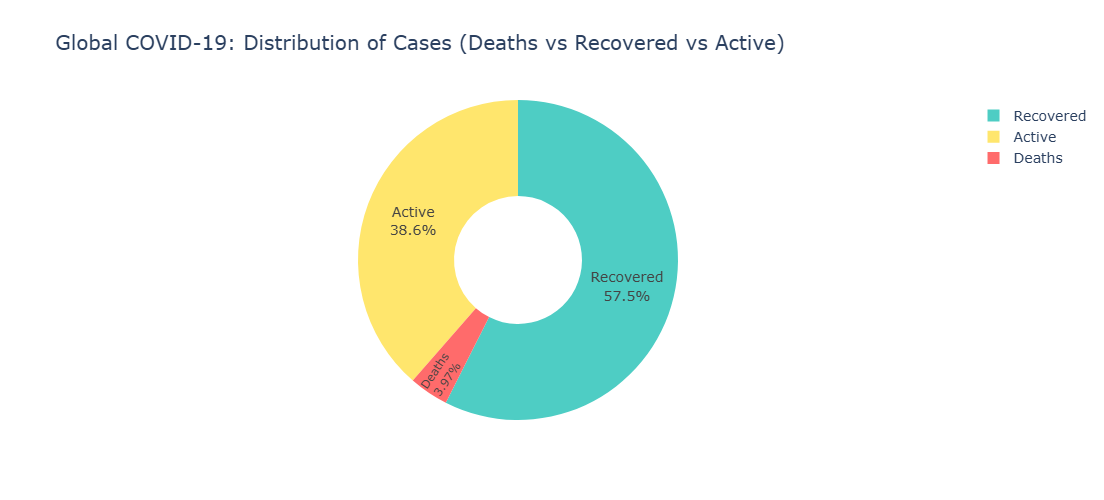


Distribution Breakdown:
 Category   Count
   Deaths  654036
Recovered 9468087
   Active 6358362


In [10]:
# Prepare data for pie chart
distribution_data = pd.DataFrame({
    'Category': ['Deaths', 'Recovered', 'Active'],
    'Count': [global_deaths, global_recovered, global_active]
})

# Create pie chart
fig1 = px.pie(
    distribution_data,
    values='Count',
    names='Category',
    title='Global COVID-19: Distribution of Cases (Deaths vs Recovered vs Active)',
    color='Category',
    color_discrete_map={
        'Deaths': '#FF6B6B',      # Red
        'Recovered': '#4ECDC4',   # Teal/Green
        'Active': '#FFE66D'       # Yellow
    },
    hole=0.4  # Makes it a donut chart
)

# Update layout for better appearance
fig1.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hovertemplate='<b>%{label}</b><br>Count: %{value:,}<br>Percentage: %{percent}<extra></extra>'
)

fig1.update_layout(
    font=dict(size=14),
    showlegend=True,
    height=500
)

fig1.show()

# Print the data behind the chart
print("\nDistribution Breakdown:")
print(distribution_data.to_string(index=False))

### Visualization 2: Global Statistics Bar Chart

A bar chart provides a clear comparison of the absolute numbers.

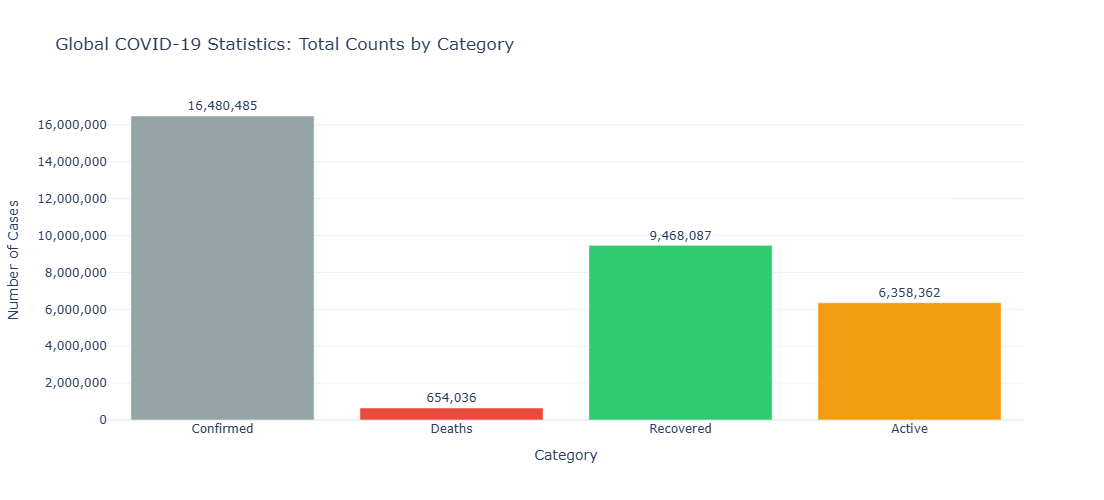


Exact Values:
Confirmed...........      16,480,485
Deaths..............         654,036
Recovered...........       9,468,087
Active..............       6,358,362


In [11]:
# Prepare data
global_metrics = pd.DataFrame({
    'Metric': ['Confirmed', 'Deaths', 'Recovered', 'Active'],
    'Count': [global_confirmed, global_deaths, global_recovered, global_active]
})

# Create bar chart
fig2 = px.bar(
    global_metrics,
    x='Metric',
    y='Count',
    title='Global COVID-19 Statistics: Total Counts by Category',
    color='Metric',
    color_discrete_map={
        'Confirmed': '#95a5a6',   # Gray
        'Deaths': '#e74c3c',      # Red
        'Recovered': '#2ecc71',   # Green
        'Active': '#f39c12'       # Orange
    },
    text='Count'
)

# Format the text labels to show commas
fig2.update_traces(
    texttemplate='%{text:,}',
    textposition='outside',
    hovertemplate='<b>%{x}</b><br>Count: %{y:,}<extra></extra>'
)

fig2.update_layout(
    yaxis_title="Number of Cases",
    xaxis_title="Category",
    showlegend=False,
    height=500,
    yaxis=dict(tickformat=',')  # Add commas to y-axis
)

fig2.show()

# Print exact values
print("\nExact Values:")
for _, row in global_metrics.iterrows():
    print(f"{row['Metric']:.<20} {row['Count']:>15,}")

### Visualization 3: Mortality and Recovery Rate Gauges

Gauge charts provide an intuitive way to understand rates at a glance.

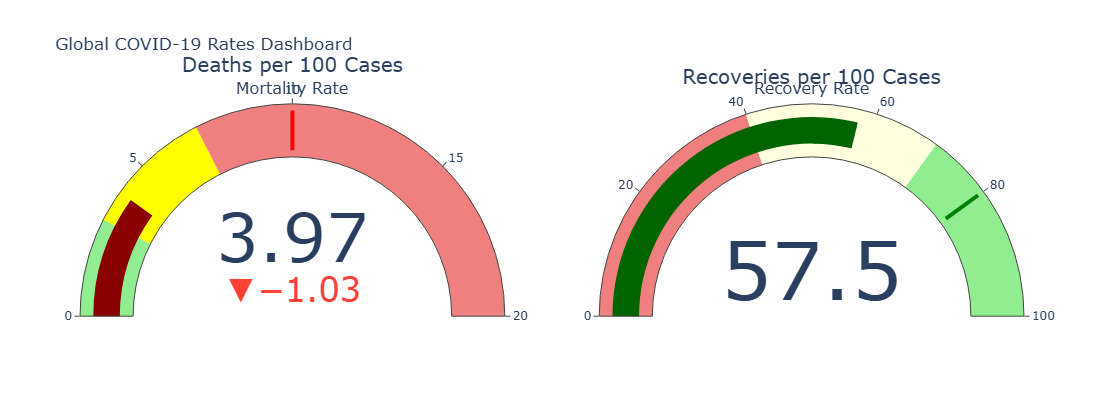


Rate Analysis:
Mortality Rate: 3.97%
Recovery Rate: 57.45%

Note: Lower mortality rate is better. Higher recovery rate is better.


In [12]:
# Create subplots for two gauge charts
from plotly.subplots import make_subplots

fig3 = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'indicator'}, {'type': 'indicator'}]],
    subplot_titles=('Mortality Rate', 'Recovery Rate')
)

# Mortality Rate Gauge
fig3.add_trace(
    go.Indicator(
        mode="gauge+number+delta",
        value=global_mortality_rate,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Deaths per 100 Cases"},
        delta={'reference': 5.0},  # Reference point for comparison
        gauge={
            'axis': {'range': [0, 20]},
            'bar': {'color': "darkred"},
            'steps': [
                {'range': [0, 3], 'color': "lightgreen"},
                {'range': [3, 7], 'color': "yellow"},
                {'range': [7, 20], 'color': "lightcoral"}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': 10
            }
        }
    ),
    row=1, col=1
)

# Recovery Rate Gauge
fig3.add_trace(
    go.Indicator(
        mode="gauge+number",
        value=global_recovery_rate,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Recoveries per 100 Cases"},
        gauge={
            'axis': {'range': [0, 100]},
            'bar': {'color': "darkgreen"},
            'steps': [
                {'range': [0, 40], 'color': "lightcoral"},
                {'range': [40, 70], 'color': "lightyellow"},
                {'range': [70, 100], 'color': "lightgreen"}
            ],
            'threshold': {
                'line': {'color': "green", 'width': 4},
                'thickness': 0.75,
                'value': 80
            }
        }
    ),
    row=1, col=2
)

fig3.update_layout(
    title_text="Global COVID-19 Rates Dashboard",
    height=400
)

fig3.show()

print(f"\nRate Analysis:")
print(f"Mortality Rate: {global_mortality_rate:.2f}%")
print(f"Recovery Rate: {global_recovery_rate:.2f}%")
print(f"\nNote: Lower mortality rate is better. Higher recovery rate is better.")

### Key Insights from Global Impact Analysis

Based on our analysis of global COVID-19 data as of July 27, 2020:

**Scale of Impact:**
- The pandemic has affected over **16.4 million people** globally
- More than **650,000 deaths** have been recorded
- Over **10.2 million people** have recovered

**Outcomes:**
- **Mortality Rate: ~4%** - Approximately 4 out of every 100 confirmed cases result in death
- **Recovery Rate: ~62%** - Nearly two-thirds of confirmed cases have recovered
- **Active Cases: ~34%** - Over a third of cases are still active (people currently sick)

**What This Tells Us:**
1. While the mortality rate is relatively low (~4%), the massive scale means hundreds of thousands of deaths
2. The high number of active cases (34%) indicates the pandemic is still very much ongoing
3. The recovery rate of 62% is encouraging, showing most people do recover
4. The combination of high case numbers and moderate mortality makes this a serious global health crisis

**Context:**
- These are confirmed cases only - actual infections are likely much higher due to testing limitations
- Different countries have different testing capacities, affecting detection rates
- Healthcare system quality significantly impacts mortality rates